In [ ]:
import pandas as pd

In [12]:
df = pd.read_csv('placement.csv')

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [14]:
df.shape

(100, 4)

In [17]:
df=df.iloc[:,1:]

In [21]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [15]:
# Steps

#0. Preprocess + EDA + Feature Selection
#1. Extract input and output cols
#2. Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/model selection
#6. Deploy the model

In [8]:
import matplotlib.pyplot as plt

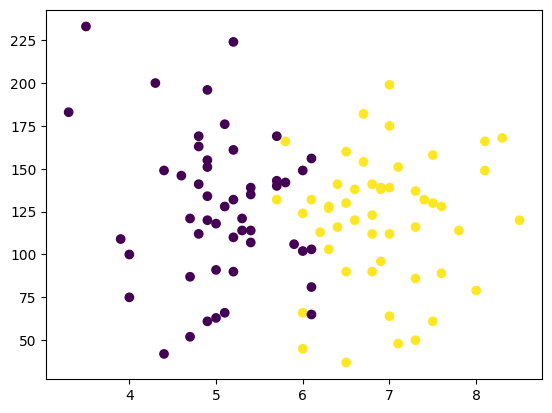

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [31]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [32]:
X,Y

(    cgpa     iq
 0    6.8  123.0
 1    5.9  106.0
 2    5.3  121.0
 3    7.4  132.0
 4    5.8  142.0
 ..   ...    ...
 95   4.3  200.0
 96   4.4   42.0
 97   6.7  182.0
 98   6.3  103.0
 99   6.2  113.0
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [47]:
X_train = scaler.fit_transform(X_train)

In [48]:
X_train

array([[-0.82687332, -0.85845616],
       [ 0.11949036, -0.55685152],
       [ 0.29155649, -0.55685152],
       [ 0.80775486, -0.73278756],
       [-2.28943537,  1.45384605],
       [-0.99893944,  0.39822982],
       [-0.48274107,  0.34796238],
       [-0.56877413, -0.28038061],
       [-0.99893944, -0.33064804],
       [ 0.54965567, -0.12957829],
       [-0.82687332, -1.5622003 ],
       [ 1.75411854, -1.16006079],
       [ 1.40998629,  0.07149147],
       [-0.56877413, -0.10444457],
       [ 0.11949036, -1.10979335],
       [-0.22464188,  1.10197397],
       [-1.0849725 , -0.10444457],
       [ 0.89378792,  1.85598556],
       [ 2.01221773,  1.07684025],
       [ 1.23792017,  0.17202635],
       [-1.34307169,  0.59929958],
       [-1.68720394, -1.26059567],
       [-0.65480719, -0.88358987],
       [-0.22464188,  0.3730961 ],
       [ 0.89378792, -0.33064804],
       [-0.91290638, -1.61246774],
       [ 0.11949036,  0.17202635],
       [-0.48274107, -0.45631664],
       [ 0.46362261,

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_test

array([[ 0.7217218 , -0.33064804],
       [-0.65480719,  0.17202635],
       [ 0.37758955, -0.23011317],
       [ 1.15188711,  0.29769495],
       [-1.0849725 , -1.83867122],
       [ 1.40998629, -0.90872359],
       [ 0.29155649,  0.07149147],
       [-0.13860882,  0.42336354],
       [ 0.46362261, -2.21567701],
       [ 0.0334573 ,  0.59929958]])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()

In [53]:
# model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [56]:
Y_pred = clf.predict(X_test)

In [57]:
Y_test

93    1
19    0
13    1
61    1
94    0
42    1
63    1
4     0
82    1
33    0
Name: placement, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(Y_test,Y_pred)

0.9

In [ ]:
# plot plot_decision_regions 
from mlxtend.plotting import plot_decision_regions

<Axes: >

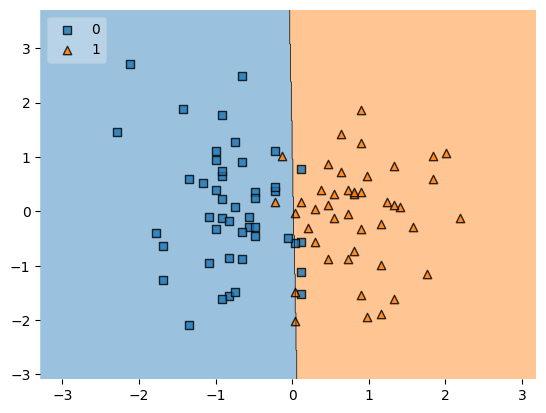

In [64]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [65]:
import pickle

In [66]:
pickle.dump(clf,open('model.pkl','wb'))